In [13]:
import joblib

model=joblib.load('brain_tumor_kmeans_model.sav')
tumorLabel=4

In [14]:
import os
import matplotlib.pyplot as plt
import numpy as np

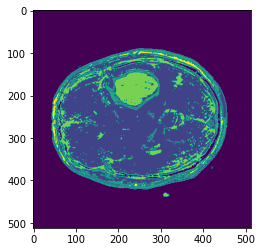

In [15]:
import cv2

img=cv2.imread('test_images/0 (237).jpg',0)
img_original=cv2.imread('test_images/0 (237).jpg')
height,width=img.shape
imgFlatten=img.reshape(height*width,1)
labels=model.predict(imgFlatten)
labels2D=labels.reshape(height,width)
mask=(labels2D==tumorLabel)
plt.imshow(labels2D)

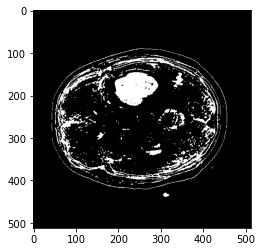

In [16]:
plt.imshow(mask,cmap='gray')

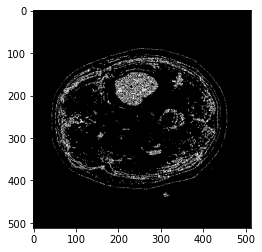

In [17]:
tumorExtracted=np.bitwise_and(mask,img)
plt.imshow(tumorExtracted,cmap='gray')
plt.show()

In [21]:
contours, hierarchy = cv2.findContours(tumorExtracted, cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
print('no. contours:',len(contours))
#cv2.drawContours(img_original,contours, -1, (0,0,255), 2)     # -1 means all contours
for cnt in contours:
    #cv2.drawContours(frame, [cnt], 0, (0,255,255), 3)
    area=cv2.contourArea(cnt)
    #print(area)
    if(area>500):

        x,y,w,h = cv2.boundingRect(cnt)
        cv2.rectangle(img_original,(x,y),(x+w,y+h),(0,255,0),2)
        cv2.rectangle(img_original,(x,y),(x+120,y-40),(0,255,0),-1)         #thicknessof rect =-1
        cv2.putText(img_original,"TUMOR",(x+10,y-10),cv2.FONT_HERSHEY_SIMPLEX,1,(255,255,255),2)

cv2.imshow('Window',img_original)
cv2.waitKey(0)
cv2.destroyAllWindows()

no. contours: 2153
